In [1]:
import numpy as np
import matplotlib.pyplot as plt

class WienerProcess():

    def __init__(self, maxT, W0=0.0, dt=0.01):
        self.W0 = W0
        self.dt = dt
        self.maxT = maxT
        self.bdy = (-np.Inf, np.Inf)
        self.build_process()

    def build_process(self):
        rng = np.random.default_rng()
        dWs = rng.normal(0.0, self.dt, np.int64(self.maxT/self.dt)-1)
        Wts = np.cumsum(dWs)
        Wts = np.insert(Wts, 0, self.W0)
        ts = np.arange(0, self.maxT, step=self.dt)
        self.process = (ts, Wts)

    def set_boundary(self, lower_bd=None, upper_bd=None):
        rng = np.random.default_rng()
        if not lower_bd:
            lower_bd = self.W0 - rng.gamma(5, 1)
        if not upper_bd:
            upper_bd = self.W0 + rng.gamma(5, 1)
        
        assert lower_bd < self.W0, "Invalid lower bound"
        assert upper_bd > self.W0, "Invalid upper bound"
        self.bdy = (lower_bd, upper_bd)

    def get_exit_index(self):
        f = lambda Wt: (Wt-self.bdy[0])*(self.bdy[1]-Wt) < 0
        assertions = f(self.process[1])
        exit_index = np.argmax(assertions)

        assert exit_index > 0, "No exit yet"
        return exit_index

    def get_exit_time(self):
        return self.get_exit_index() * self.dt
   
    def plot_full_process(self):
        plt.title("Full process with $T=$"+str(self.maxT))
        plt.xlabel("Time $T$")
        plt.plot(self.process[0], self.process[1])
        plt.hlines(self.bdy[0], 0, self.maxT, colors="Red")
        plt.hlines(self.bdy[1], 0, self.maxT, colors="Red")
        plt.show()
    
    def plot_up_to_exit(self):
        Wts = self.process[1][:self.get_exit_index()]
        ts = self.process[0][:self.get_exit_index()]
        plt.title("Process up to the exit time "+str(self.get_exit_time()))
        plt.xlabel("Time $T$")
        plt.plot(ts, Wts)
        plt.hlines(self.bdy[0], 0, self.get_exit_time(), colors="Red")
        plt.hlines(self.bdy[1], 0, self.get_exit_time(), colors="Red")
        plt.show()

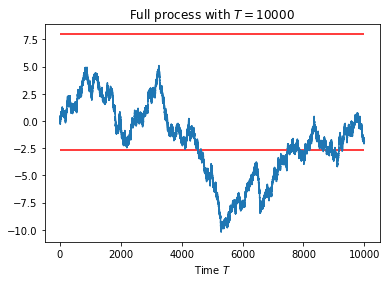

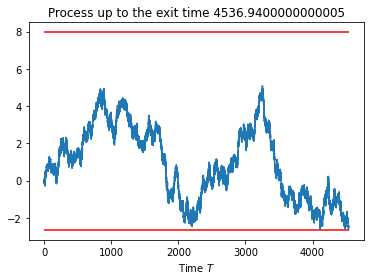

In [2]:
wp = WienerProcess(10000)
wp.set_boundary()
wp.plot_full_process()
wp.plot_up_to_exit()